<a href="https://colab.research.google.com/github/D1EB/-CogView/blob/main/kandinsky2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/ai-forever/diffusers.git
!pip install transformers
!pip install accelerate

In [2]:
import sys
from diffusers import KandinskyV22Pipeline, KandinskyV22PriorPipeline
import torch
import PIL
import torch
from diffusers.utils import load_image
from torchvision import transforms
from transformers import CLIPVisionModelWithProjection
from diffusers.models import UNet2DConditionModel
import numpy as np

DEVICE = torch.device('cuda:0')

In [3]:
image_encoder = CLIPVisionModelWithProjection.from_pretrained(
    'kandinsky-community/kandinsky-2-2-prior',
    subfolder='image_encoder'
).half().to(DEVICE)

In [4]:
unet = UNet2DConditionModel.from_pretrained(
    'kandinsky-community/kandinsky-2-2-decoder',
    subfolder='unet'
).half().to(DEVICE)

In [5]:
prior = KandinskyV22PriorPipeline.from_pretrained(
    'kandinsky-community/kandinsky-2-2-prior',
    image_encoder=image_encoder,
    torch_dtype=torch.float16
).to(DEVICE)

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [6]:
decoder = KandinskyV22Pipeline.from_pretrained(
    'kandinsky-community/kandinsky-2-2-decoder',
    unet=unet,
    torch_dtype=torch.float16
).to(DEVICE)

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

In [33]:
torch.manual_seed(42)

negative_prior_prompt ='lowres, text, error, cropped, worst quality, low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, out of frame, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck, username, watermark, signature'
img_emb = prior(
    prompt='Мечтали сделать пиццу как в лучших итальянских ресторанах, не выходя из дома? Саша Белькович раскроет все секреты быстрого и легкого приготовления домашней пиццы всего за 7 минут!. Покажет, как правильно разогреть духовку, какие ингредиенты подходят для идеального соуса и как сделать тончайшее и нежнейшее тесто. Домашняя пицца, которая не оставит равнодушным ни одного итальянца!',
    num_inference_steps=25,
    num_images_per_prompt=1
)

negative_emb = prior(
    prompt=negative_prior_prompt,
    num_inference_steps=25,
    num_images_per_prompt=1
)


images = decoder(
    image_embeds=img_emb.image_embeds,
    negative_image_embeds=negative_emb.image_embeds,
    num_inference_steps=75,
    height=512,
    width=512)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['� из дома? саша белькович раскроет все секреты быстрого и легкого приготовления домашней пиццы всего за 7 минут!. покажет, как правильно разогреть духовку, какие ингредиенты подходят для идеального соуса и как сделать тончайшее и нежнейшее тесто. домашняя пицца, которая не оставит равнодушным ни одного итальянца!']


  0%|          | 0/25 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck, username, watermark, signature']


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

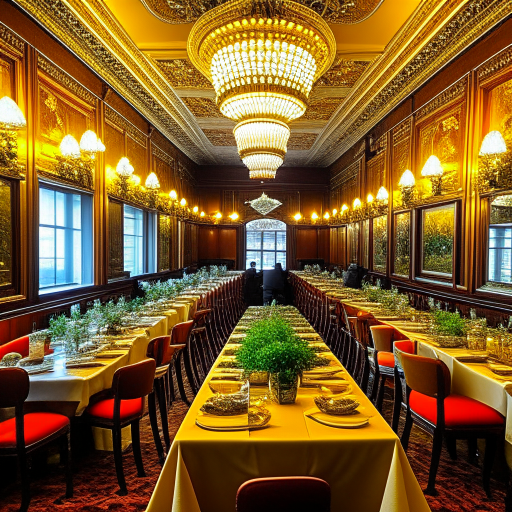

In [34]:











images.images[0]